In [15]:
# ------------------------------
# Import Libraries
# ------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# For reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)

In [16]:
# ------------------------------
# Generate Fruit Dataset
# ------------------------------

n_samples = 50  # Number of samples per fruit

# Define fruits and features
fruits = {
    'Apple':   {'weight': (165, 10), 'diameter': (7, 0.5), 'color': 1, 'sweetness': (7,1)},
    'Orange':  {'weight': (200, 15), 'diameter': (8, 0.5), 'color': 3, 'sweetness': (6,1)},
    'Banana':  {'weight': (135, 10), 'diameter': (4.5, 0.3), 'color': 2, 'sweetness': (8,1)},
    'Pear':    {'weight': (180, 12), 'diameter': (8, 0.5), 'color': 4, 'sweetness': (6,1)},
    'Mango':   {'weight': (225, 15), 'diameter': (8.5, 0.5), 'color': 5, 'sweetness': (9,1)}
}

# Generate data
data = []
for fruit, params in fruits.items():
    for _ in range(n_samples):
        weight = np.random.normal(params['weight'][0], params['weight'][1])
        diameter = np.random.normal(params['diameter'][0], params['diameter'][1])
        color = params['color']  # categorical numeric encoding
        sweetness = np.random.normal(params['sweetness'][0], params['sweetness'][1])
        data.append([weight, diameter, color, sweetness, fruit])

# Create DataFrame
df = pd.DataFrame(data, columns=['Weight', 'Diameter', 'Color', 'Sweetness', 'Label'])

# Shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)

# Save dataset
df.to_csv('fruit_dataset_long.csv', index=False)
print("Dataset Generated (first 10 rows):\n")
print(df.head(10))

Dataset Generated (first 10 rows):

       Weight  Diameter  Color  Sweetness   Label
0  200.873131  7.428515      3   6.357787  Orange
1  210.293903  7.193642      3   5.528068  Orange
2  165.917608  6.006216      1   6.780328   Apple
3  206.657291  8.387317      3   5.073070  Orange
4  172.241125  7.459226      4   7.687142    Pear
5  224.638124  8.599042      5   8.855640   Mango
6  221.803011  7.867672      3   8.720169  Orange
7  245.334568  8.706717      5  10.876796   Mango
8  160.208258  6.907171      1   5.893665   Apple
9  169.967142  6.930868      1   7.647689   Apple



Dataset Summary:

           Weight    Diameter       Color   Sweetness
count  250.000000  250.000000  250.000000  250.000000
mean   181.883569    7.129831    3.000000    7.227519
std     33.187869    1.479452    1.417051    1.551015
min    117.412605    3.862831    1.000000    3.788865
25%    158.657335    6.601239    2.000000    6.085265
50%    179.777990    7.571416    3.000000    7.139350
75%    206.990944    8.163570    4.000000    8.294102
max    263.600397    9.539440    5.000000   11.445752

Class Distribution:

Label
Orange    50
Apple     50
Pear      50
Mango     50
Banana    50
Name: count, dtype: int64


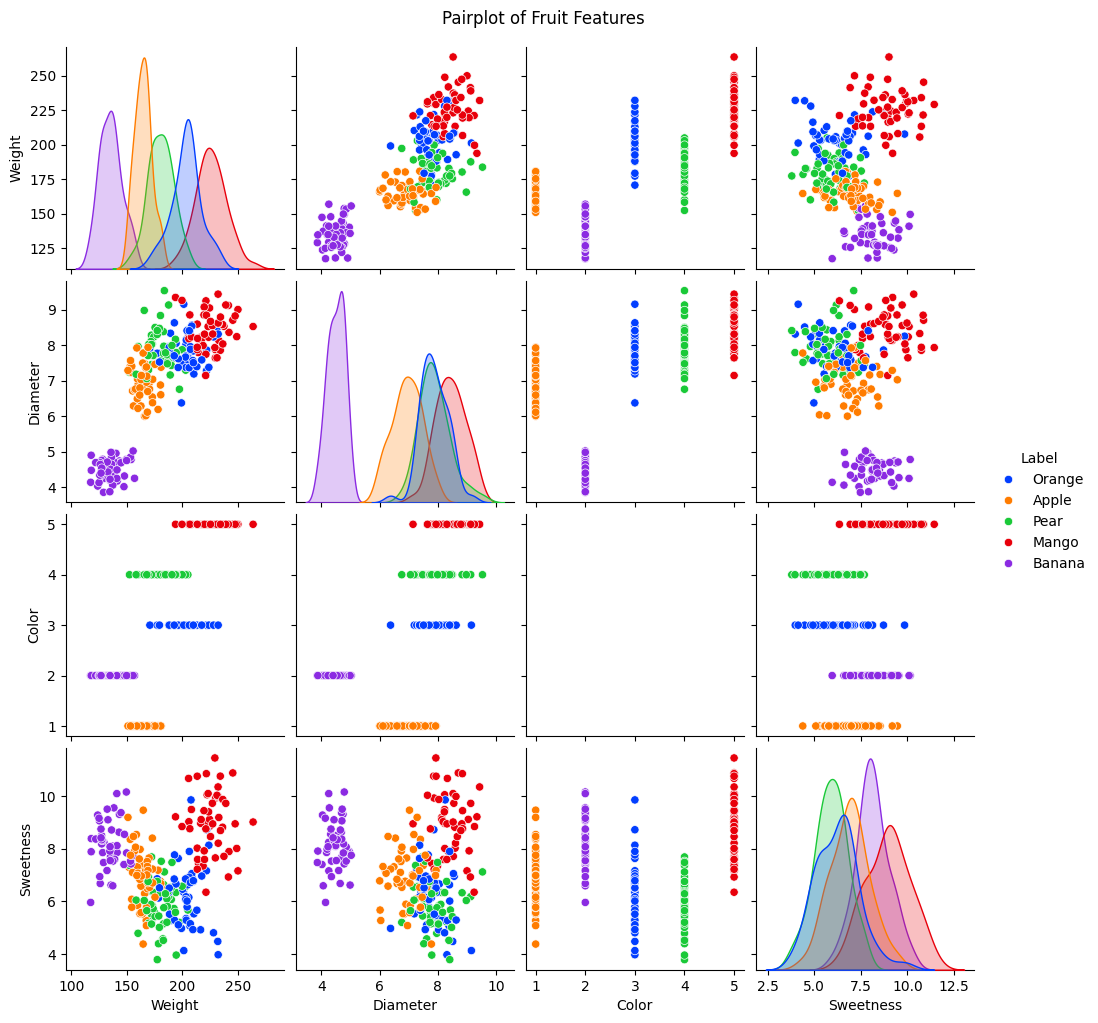

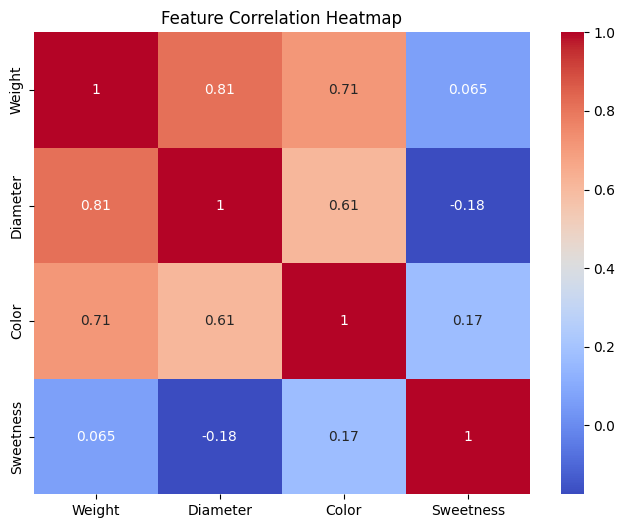

In [17]:
# ------------------------------
# Exploratory Data Analysis
# ------------------------------

print("\nDataset Summary:\n")
print(df.describe())

print("\nClass Distribution:\n")
print(df['Label'].value_counts())

# Pairplot for feature visualization
sns.pairplot(df, hue='Label', diag_kind='kde', palette='bright')
plt.suptitle("Pairplot of Fruit Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('Label', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
# ------------------------------
# Encode Labels and Split Data
# ------------------------------

# Encode fruit labels to numeric
label_map = {label: idx for idx, label in enumerate(df['Label'].unique())}
df['Label_Code'] = df['Label'].map(label_map)

X = df[['Weight', 'Diameter', 'Color', 'Sweetness']].values
y = df['Label_Code'].values
class_labels = list(label_map.keys())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nTraining Samples per Class:")
for c in np.unique(y_train):
    print(f"{class_labels[c]}: {(y_train==c).sum()} samples")


Training Samples per Class:
Orange: 35 samples
Apple: 35 samples
Pear: 35 samples
Mango: 35 samples
Banana: 35 samples


In [19]:
# ------------------------------
# Calculate Priors
# ------------------------------
classes = np.unique(y_train)
priors = {}
for c in classes:
    priors[c] = np.sum(y_train == c) / len(y_train)
print("\nClass Priors:")
for c in classes:
    print(f"{class_labels[c]}: {priors[c]:.2f}")

# ------------------------------
# Calculate Mean and Covariance per Class
# ------------------------------
means = {}
covariances = {}
for c in classes:
    X_c = X_train[y_train == c]
    means[c] = np.mean(X_c, axis=0)
    covariances[c] = np.cov(X_c, rowvar=False)
    print(f"\n{class_labels[c]} Mean Vector:\n{means[c]}")
    print(f"{class_labels[c]} Covariance Matrix:\n{covariances[c]}")


Class Priors:
Orange: 0.20
Apple: 0.20
Pear: 0.20
Mango: 0.20
Banana: 0.20

Orange Mean Vector:
[203.19439841   7.90251182   3.           6.20910029]
Orange Covariance Matrix:
[[ 2.18980015e+02  8.66498857e-01  0.00000000e+00 -4.58701186e+00]
 [ 8.66498857e-01  1.91581557e-01  0.00000000e+00 -1.86830803e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.58701186e+00 -1.86830803e-01  0.00000000e+00  1.13121867e+00]]

Apple Mean Vector:
[163.83303739   6.92413685   1.           6.76817153]
Apple Covariance Matrix:
[[50.68635591 -0.17316098  0.         -1.38760424]
 [-0.17316098  0.3123969   0.         -0.05727938]
 [ 0.          0.          0.          0.        ]
 [-1.38760424 -0.05727938  0.          0.82532575]]

Pear Mean Vector:
[179.82686312   7.87004702   4.           5.99486217]
Pear Covariance Matrix:
[[ 1.42416729e+02  6.21687490e-01  0.00000000e+00 -7.20603428e-02]
 [ 6.21687490e-01  2.92194840e-01  0.00000000e+00 -7.74154040e-02]
 [ 0.00000000e+00  

In [20]:
# ------------------------------
# Gaussian Likelihood Function
# ------------------------------
def gaussian_likelihood(x, mean, cov):
    d = len(x)
    cov_inv = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    norm_const = 1.0 / (np.power(2*np.pi, d/2) * np.sqrt(det_cov))
    diff = x - mean
    result = norm_const * np.exp(-0.5 * np.dot(np.dot(diff.T, cov_inv), diff))
    return result

In [21]:
# ------------------------------
# Bayesian Prediction Function
# ------------------------------
def predict(X):
    y_pred = []
    for x in X:
        posteriors = []
        for c in classes:
            prior = priors[c]
            likelihood = gaussian_likelihood(x, means[c], covariances[c])
            posterior = prior * likelihood
            posteriors.append(posterior)
        y_pred.append(np.argmax(posteriors))
    return np.array(y_pred)


Test Accuracy: 85.33%

Confusion Matrix:
 [[10  0  3  2  0]
 [ 0 13  2  0  0]
 [ 2  1 12  0  0]
 [ 1  0  0 14  0]
 [ 0  0  0  0 15]]

Classification Report:
               precision    recall  f1-score   support

      Orange       0.77      0.67      0.71        15
       Apple       0.93      0.87      0.90        15
        Pear       0.71      0.80      0.75        15
       Mango       0.88      0.93      0.90        15
      Banana       1.00      1.00      1.00        15

    accuracy                           0.85        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.86      0.85      0.85        75



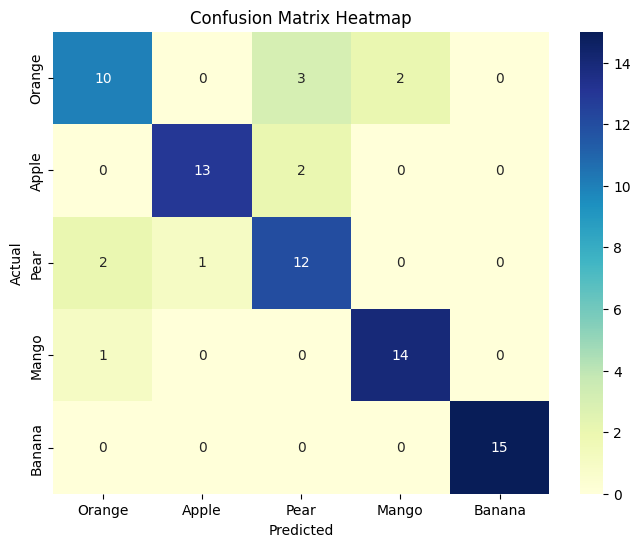

In [23]:
# ------------------------------
# Fixed Predictions and Evaluation
# ------------------------------

# Use only features that vary (remove Color)
X_train_new = X_train[:, [0, 1, 3]]  # Weight, Diameter, Sweetness
X_test_new = X_test[:, [0, 1, 3]]

# Recompute means and covariances for reduced features
epsilon = 1e-3  # small regularization to avoid singular matrix
means_new = {}
covariances_new = {}

for c in classes:
    X_c = X_train_new[y_train == c]
    means_new[c] = np.mean(X_c, axis=0)
    cov = np.cov(X_c, rowvar=False)
    cov += np.eye(cov.shape[0]) * epsilon  # regularize
    covariances_new[c] = cov

# Modified Gaussian likelihood for new features
def gaussian_likelihood_new(x, mean, cov):
    d = len(x)
    cov_inv = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    norm_const = 1.0 / (np.power(2*np.pi, d/2) * np.sqrt(det_cov))
    diff = x - mean
    result = norm_const * np.exp(-0.5 * np.dot(np.dot(diff.T, cov_inv), diff))
    return result

# Modified prediction function
def predict_new(X):
    y_pred = []
    for x in X:
        posteriors = []
        for c in classes:
            prior = priors[c]
            likelihood = gaussian_likelihood_new(x, means_new[c], covariances_new[c])
            posterior = prior * likelihood
            posteriors.append(posterior)
        y_pred.append(np.argmax(posteriors))
    return np.array(y_pred)

# Make predictions
y_pred_new = predict_new(X_test_new)

# Accuracy
acc = accuracy_score(y_test, y_pred_new)
print(f"\nTest Accuracy: {acc*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_new)
print("\nConfusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred_new, target_names=class_labels)
print("\nClassification Report:\n", report)

# Heatmap of Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

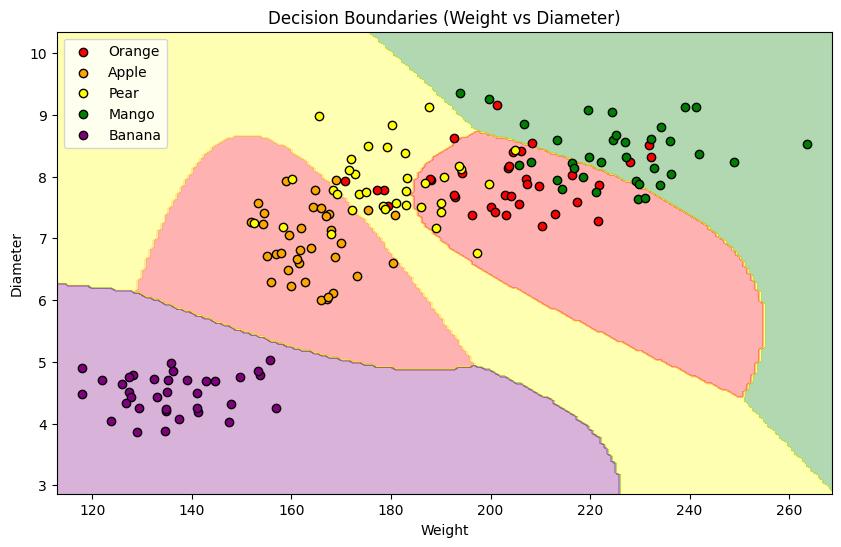

In [25]:
# ------------------------------
# Fixed Decision Boundary Visualization
# ------------------------------
import matplotlib.colors as mcolors

# Use only Weight and Diameter for 2D visualization
feature_indices = [0, 1]  # Weight and Diameter
x_min, x_max = X_train_new[:,feature_indices[0]].min() - 5, X_train_new[:,feature_indices[0]].max() + 5
y_min, y_max = X_train_new[:,feature_indices[1]].min() - 1, X_train_new[:,feature_indices[1]].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# For other features (Sweetness) use mean value
mean_sweetness = np.mean(X_train_new[:,2])
grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, mean_sweetness)]

# Predict using the new prediction function
Z = predict_new(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
colors = ['red', 'orange', 'yellow', 'green', 'purple']
cmap = mcolors.ListedColormap(colors[:len(classes)])

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

# Plot training points
for c in classes:
    plt.scatter(X_train_new[y_train==c][:,feature_indices[0]],
                X_train_new[y_train==c][:,feature_indices[1]],
                color=colors[c], edgecolor='k', label=class_labels[c])

plt.xlabel("Weight")
plt.ylabel("Diameter")
plt.title("Decision Boundaries (Weight vs Diameter)")
plt.legend()
plt.show()